In [114]:
import numpy as np
import sympy as sp 
import scipy as sc

import networkx as nx
import minorminer as mm 
import dwave_networkx as dnx

import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

# from sympy.physics.quantum import TensorProduct

from Utilities import PyQUBO_Helpers
from Utilities import Channel_Rayleigh, Gauss_noise, Dict_to_Mat

from Call_Problem import Problemv2

In [2]:
s = np.array([1-1J, 3+1J], dtype=complex)

trial = Problemv2([2,2], [-4,4], 4, s)

In [3]:
test = trial.Get_Problem('MAX', [2,3,1])
test_model = test.compile()
# print(test_model.to_qubo(index_label=True),'\n')

print(len(test_model.variables), '\n')

144 



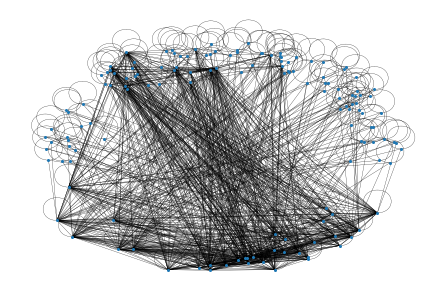

In [6]:
qubomat = Dict_to_Mat(test_model.to_qubo(index_label=True)[0])

graph = nx.from_numpy_array(qubomat)
nx.draw(graph, node_size=4, width=0.25)
plt.show()


In [7]:
G_pegasus = dnx.pegasus_graph(6)

In [39]:
embedding = mm.find_embedding(graph, G_pegasus, return_overlap=True)

# print(embedding, '\n')
# print(len(embedding))
chains = list(embedding[0].values())

chain_lengths = []
for chain in chains:
    chain_lengths.append(len(chain))

print(chain_lengths)


[8, 8, 7, 7, 8, 10, 13, 9, 13, 11, 10, 12, 9, 6, 7, 9, 8, 8, 10, 8, 9, 9, 9, 9, 6, 4, 6, 5, 6, 4, 6, 3, 5, 3, 5, 4, 4, 3, 3, 3, 5, 4, 4, 7, 3, 3, 7, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1]


In [43]:
def chain(embedding):
    chains = list(embedding[0].values())

    chain_lengths = []
    for chain in chains:
        chain_lengths.append(len(chain))
    return chains, chain_lengths

In [44]:
max(chain(embedding)[1])

13

In [45]:
import itertools

def nq_embedding(chains):
    return len(list(itertools.chain(*chains)))

In [46]:
nq_embedding(chains)

434

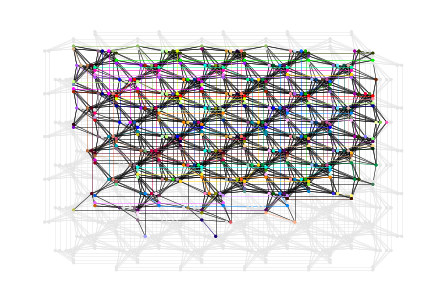

In [31]:
dnx.draw_pegasus_embedding(G_pegasus, embedding[0], node_size=4, width=0.5)
plt.show()

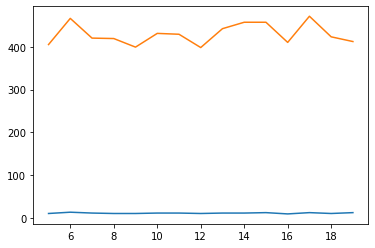

In [48]:
### MAX and penalty[0] ###
longest_chain = []
nq_emb = []
for p in range(5,20):
    test = trial.Get_Problem('MAX', [p,0,0])
    test_model = test.compile()
    
    qubomat = Dict_to_Mat(test_model.to_qubo(index_label=True)[0])

    graph = nx.from_numpy_array(qubomat)
    
    embedding = mm.find_embedding(graph, G_pegasus, return_overlap=True)
    
    chains, chain_lens = chain(embedding)
    nq_emb.append(nq_embedding(chains))
    longest_chain.append(max(chain_lens))
    
plt.plot(range(5,20), longest_chain)
plt.plot(range(5,20), nq_emb)
plt.show()

In [52]:
### FULL Problem graph###

test = trial.Get_Problem('FULL', [5,5,5])
test_model = test.compile()

qubomat = Dict_to_Mat(test_model.to_qubo(index_label=True)[0])

graph = nx.from_numpy_array(qubomat)

embedding = mm.find_embedding(graph, G_pegasus, return_overlap=True)

chains, chain_lens = chain(embedding)
nq_emb = nq_embedding(chains)
longest_chain = max(chain_lens)

print(longest_chain, nq_emb)

12 427


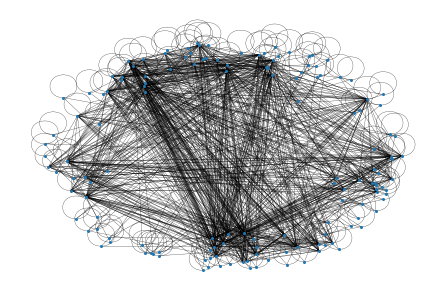

In [53]:
nx.draw(graph, node_size=4, width=0.25)
plt.show()

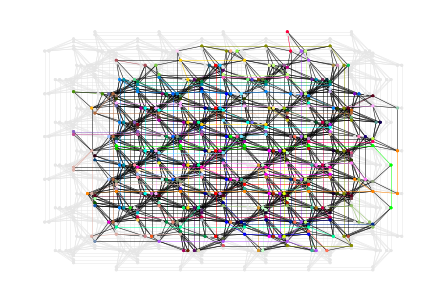

In [55]:
dnx.draw_pegasus_embedding(G_pegasus, embedding[0], node_size=4, width=0.5)
plt.show()

In [61]:
import random

def create_s(length):
    real = np.array([random.randrange(-3,4,2) for p in range(0,length)])
    im = np.array([random.randrange(-3,4,2) for p in range(0,length)])

    return real + im*1J
create_s(4)

array([ 1.-1.j, -3.+1.j, -1.+1.j,  3.+1.j])

In [82]:
#### FULL problem counting ####
G_pegasus_16 = dnx.pegasus_graph(16)

no_users, no_transmit = 2,2
problem_size = [no_users, no_transmit]

s = create_s(no_users)

## keeping problem size const, varying accuracy
nq_pre = []
nq_compiled = []
nq_post_emb = []
longest_chain = []

for nq in range(2, 8):
    
    trial = Problemv2(problem_size, [-4,4], nq, s)
    
    test = trial.Get_Problem('FULL', [5,5,5])
    test_model = test.compile()
    
    qubomat = Dict_to_Mat(test_model.to_qubo(index_label=True)[0])

    graph = nx.from_numpy_array(qubomat)

    embedding = mm.find_embedding(graph, G_pegasus_16, return_overlap=True)

    chains, chain_lens = chain(embedding)
    
    nq_pre.append(2*problem_size[1]*nq+2*nq)
    nq_compiled.append(len(test_model.variables))
    nq_post_emb.append(nq_embedding(chains))
    longest_chain.append(max(chain_lens))

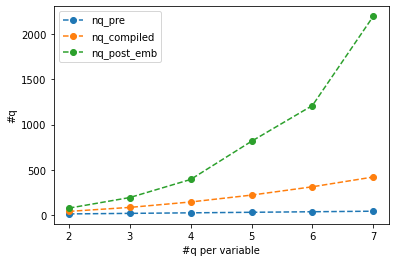

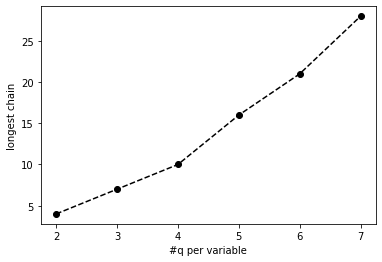

In [84]:
plt.plot(range(2,8), nq_pre, '--o', label='nq_pre')
plt.plot(range(2,8), nq_compiled, '--o', label='nq_compiled')
plt.plot(range(2,8), nq_post_emb, '--o', label='nq_post_emb')
plt.xlabel('#q per variable')
plt.ylabel('#q')
plt.legend()
plt.show()

plt.plot(range(2,8), longest_chain,'--o', label='longest_chain', c='k')
plt.xlabel('#q per variable')
plt.ylabel('longest chain')
# plt.title('Longest Chain')
plt.show()

In [90]:
#### FULL problem counting ####
G_pegasus_16 = dnx.pegasus_graph(16)

## keeping accuracy const, varying problem size
nq_pre = []
nq_compiled = []
nq_post_emb = []
longest_chain = []

for no_transmit in range(2, 4):
    
    problem_size = [no_transmit, no_transmit]
    s = create_s(problem_size[0])
    
    trial = Problemv2(problem_size, [-4,4], 4, s)
    
    test = trial.Get_Problem('FULL', [5,5,5])
    test_model = test.compile()
    
    qubomat = Dict_to_Mat(test_model.to_qubo(index_label=True)[0])

    graph = nx.from_numpy_array(qubomat)

    embedding = mm.find_embedding(graph, G_pegasus_16, return_overlap=True)

    chains, chain_lens = chain(embedding)
    
    nq_pre.append(2*problem_size[1]*nq+2*nq)
    nq_compiled.append(len(test_model.variables))
    nq_post_emb.append(nq_embedding(chains))
    longest_chain.append(max(chain_lens))

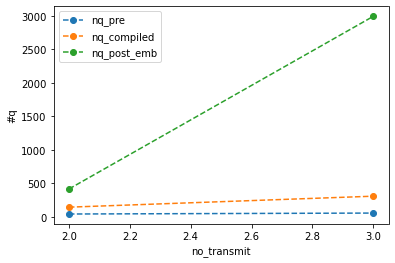

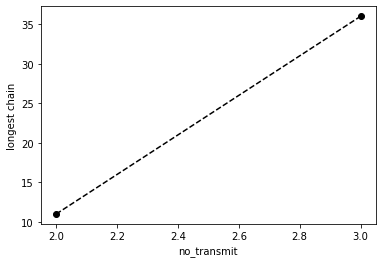

In [91]:
plt.plot(range(2,4), nq_pre, '--o', label='nq_pre')
plt.plot(range(2,4), nq_compiled, '--o', label='nq_compiled')
plt.plot(range(2,4), nq_post_emb, '--o', label='nq_post_emb')
plt.xlabel('no_transmit')
plt.ylabel('#q')
plt.legend()
plt.show()

plt.plot(range(2,4), longest_chain,'--o', label='longest_chain', c='k')
plt.xlabel('no_transmit')
plt.ylabel('longest chain')
# plt.title('Longest Chain')
plt.show()

In [96]:
#### EVM problem counting ####

G_pegasus_16 = dnx.pegasus_graph(16)

no_users, no_transmit = 2,2
problem_size = [no_users, no_transmit]

s = create_s(no_users)

## keeping problem size const, varying accuracy
nq_pre = []
nq_compiled = []
nq_post_emb = []
longest_chain = []

for nq in range(2, 10):
    
    trial = Problemv2(problem_size, [-4,4], nq, s)
    
    test = trial.Get_Problem('EVM', [5,5,5])
    test_model = test.compile()
    
    qubomat = Dict_to_Mat(test_model.to_qubo(index_label=True)[0])

    graph = nx.from_numpy_array(qubomat)

    embedding = mm.find_embedding(graph, G_pegasus_16, return_overlap=True)

    chains, chain_lens = chain(embedding)
    
    nq_pre.append(2*problem_size[1]*nq+2*nq)
    nq_compiled.append(len(test_model.variables))
    nq_post_emb.append(nq_embedding(chains))
    longest_chain.append(max(chain_lens))

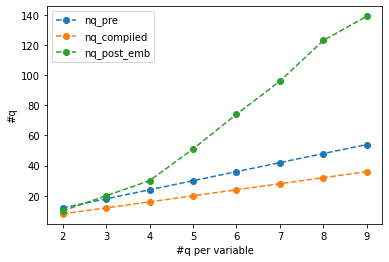

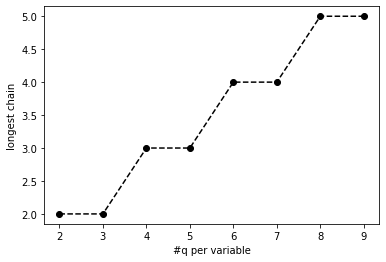

In [97]:
plt.plot(range(2,10), nq_pre, '--o', label='nq_pre')
plt.plot(range(2,10), nq_compiled, '--o', label='nq_compiled')
plt.plot(range(2,10), nq_post_emb, '--o', label='nq_post_emb')
plt.xlabel('#q per variable')
plt.ylabel('#q')
plt.legend()
plt.show()

plt.plot(range(2,10), longest_chain,'--o', label='longest_chain', c='k')
plt.xlabel('#q per variable')
plt.ylabel('longest chain')
# plt.title('Longest Chain')
plt.show()

In [98]:
#### EVM problem counting ####
G_pegasus_16 = dnx.pegasus_graph(16)

## keeping accuracy const, varying problem size
nq_pre = []
nq_compiled = []
nq_post_emb = []
longest_chain = []

for no_transmit in range(2, 8):
    
    problem_size = [no_transmit, no_transmit]
    s = create_s(problem_size[0])
    
    trial = Problemv2(problem_size, [-4,4], 4, s)
    
    test = trial.Get_Problem('EVM', [5,5,5])
    test_model = test.compile()
    
    qubomat = Dict_to_Mat(test_model.to_qubo(index_label=True)[0])

    graph = nx.from_numpy_array(qubomat)

    embedding = mm.find_embedding(graph, G_pegasus_16, return_overlap=True)

    chains, chain_lens = chain(embedding)
    
    nq_pre.append(2*problem_size[1]*nq+2*nq)
    nq_compiled.append(len(test_model.variables))
    nq_post_emb.append(nq_embedding(chains))
    longest_chain.append(max(chain_lens))

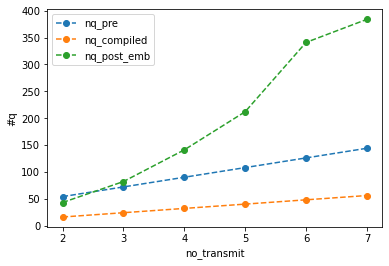

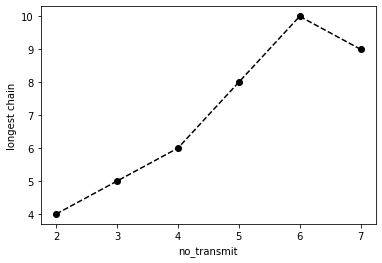

In [99]:
plt.plot(range(2,8), nq_pre, '--o', label='nq_pre')
plt.plot(range(2,8), nq_compiled, '--o', label='nq_compiled')
plt.plot(range(2,8), nq_post_emb, '--o', label='nq_post_emb')
plt.xlabel('no_transmit')
plt.ylabel('#q')
plt.legend()
plt.show()

plt.plot(range(2,8), longest_chain,'--o', label='longest_chain', c='k')
plt.xlabel('no_transmit')
plt.ylabel('longest chain')
# plt.title('Longest Chain')
plt.show()

In [102]:
#### EVM embedding for different target graph sizes ####

problem_size = [4, 4]
s = create_s(problem_size[0])

nq_pre = []
nq_compiled = []
nq_post_emb = []
longest_chain = []

for i in range(0, 13):
    G = dnx.pegasus_graph(3+i)
    
    trial = Problemv2(problem_size, [-4,4], 4, s)
    
    test = trial.Get_Problem('EVM', [5,5,5])
    test_model = test.compile()
    
    qubomat = Dict_to_Mat(test_model.to_qubo(index_label=True)[0])

    graph = nx.from_numpy_array(qubomat)

    embedding = mm.find_embedding(graph, G, return_overlap=True)

    chains, chain_lens = chain(embedding)
    
    nq_pre.append(2*problem_size[1]*nq+2*nq)
    nq_compiled.append(len(test_model.variables))
    nq_post_emb.append(nq_embedding(chains))
    longest_chain.append(max(chain_lens))

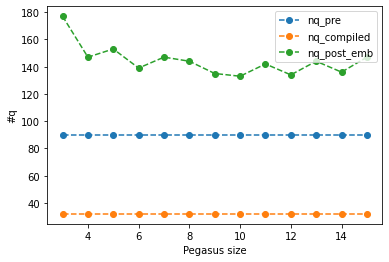

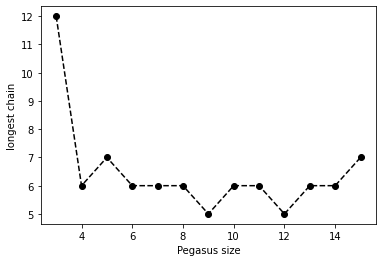

In [104]:
plt.plot(range(3,16), nq_pre, '--o', label='nq_pre')
plt.plot(range(3,16), nq_compiled, '--o', label='nq_compiled')
plt.plot(range(3,16), nq_post_emb, '--o', label='nq_post_emb')
plt.xlabel('Pegasus size')
plt.ylabel('#q')
plt.legend()
plt.show()

plt.plot(range(3,16), longest_chain,'--o', label='longest_chain', c='k')
plt.xlabel('Pegasus size')
plt.ylabel('longest chain')
# plt.title('Longest Chain')
plt.show()

In [111]:
#### MAX embedding for different target graph sizes ####

problem_size = [2, 2]
s = create_s(problem_size[0])

nq_pre = []
nq_compiled = []
nq_post_emb = []
longest_chain = []

trial = Problemv2(problem_size, [-4,4], 4, s)

test = trial.Get_Problem('MAX', [5,5,5])
test_model = test.compile()

qubomat = Dict_to_Mat(test_model.to_qubo(index_label=True)[0])

graph = nx.from_numpy_array(qubomat)

for i in range(0, 10):
    G = dnx.pegasus_graph(6+i)

    embedding = mm.find_embedding(graph, G, return_overlap=True)

    chains, chain_lens = chain(embedding)
    
    nq_pre.append(2*problem_size[1]*nq+2*nq)
    nq_compiled.append(len(test_model.variables))
    nq_post_emb.append(nq_embedding(chains))
    longest_chain.append(max(chain_lens))

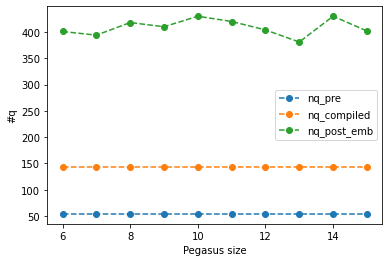

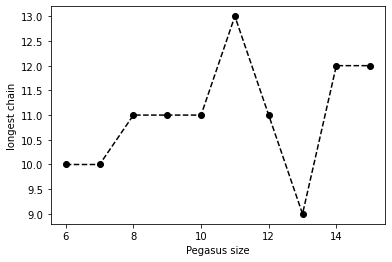

In [112]:
plt.plot(range(6,16), nq_pre, '--o', label='nq_pre')
plt.plot(range(6,16), nq_compiled, '--o', label='nq_compiled')
plt.plot(range(6,16), nq_post_emb, '--o', label='nq_post_emb')
plt.xlabel('Pegasus size')
plt.ylabel('#q')
plt.legend()
plt.show()

plt.plot(range(6,16), longest_chain,'--o', label='longest_chain', c='k')
plt.xlabel('Pegasus size')
plt.ylabel('longest chain')
# plt.title('Longest Chain')
plt.show()

#### So far, embedding done heuristically: 
#### $G_{problem} \longrightarrow G_{pegasus}$

#### Next, try: 
#### $G_{problem} \longrightarrow G_{clique} \longrightarrow G_{pegasus}$

#### After, by hand?
(finding custom embedding for the max-norm)

In [ ]:
#### Clique Embedding ####



In [ ]:
### Check Performance: L2 ###


In [130]:
nq_pre = []
nq_compiled = []
nq_post_emb = []
longest_chain = []

problem_size = [2, 2]
s = create_s(problem_size[0])
nq = 4
trial = Problemv2(problem_size, [-4,4], nq, s)

print(len(trial.xtilde))
params = [5,5,5]
test = trial.Get_Problem('FULL', [5,5,5])
test_model = test.compile()

qubomat = Dict_to_Mat(test_model.to_qubo(index_label=True)[0])

sp.Matrix(qubomat)

4


Matrix([
[82.0, 80.0, 40.0, 20.0,       -4.9999041,      -19.9996164,      -79.9984656,     -319.9938624,      -4.9999041,      -19.9996164,      -79.9984656,     -319.9938624,        -4.9999041,       -19.9996164,    -79.9984656,   -319.9938624,        -4.9999041,     -19.9996164,       -79.9984656,     -319.9938624,      -160.0,       -80.0,       -40.0,        -20.0,      -19.9996164,       319.9938624,       -19.9996164,       319.9938624,      -19.9996164,       319.9938624,       -19.9996164,       319.9938624,       -39.9992328,        79.9984656,       -79.9984656,       159.9969312,       -39.9992328,        79.9984656,       -79.9984656,       159.9969312,       -39.9992328,        79.9984656,       -79.9984656,       159.9969312,       -39.9992328,        79.9984656,       -79.9984656,       159.9969312,              0.0,              0.0,              0.0,              0.0,              0.0,              0.0,              0.0,              0.0,              0.0,            

In [126]:
p_graph = nx.from_numpy_array(qubomat)

In [129]:

embedding = mm.find_embedding(p_graph, G_pegasus_16, return_overlap=True)
print(embedding,'\n')
chains, chain_lens = chain(embedding)
print(chains, chain_lens)
# nq_pre.append(2*problem_size[1]*nq+2*nq)
# nq_compiled.append(len(test_model.variables))
# nq_post_emb.append(nq_embedding(chains))
# longest_chain.append(max(chain_lens))

({0: [3203], 1: [3188], 2: [1756], 3: [1741], 4: [3187], 5: [1545], 6: [1530], 7: [3202], 8: [3016], 9: [480], 10: [495], 11: [3001], 12: [4984], 13: [1046], 14: [4999], 15: [1031]}, 1) 

[[3203], [3188], [1756], [1741], [3187], [1545], [1530], [3202], [3016], [480], [495], [3001], [4984], [1046], [4999], [1031]] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
#### Testing Max-norm accuracy when annealing ###

## max(x)